### Coursera Learn SQL Basics for Data Science Specialization ###
### Capstone Milestone 1, project proposal and data selection / preparation.  ###
### Steve Schluchter ###



# Step 1: Perparing for your proposal

# You will document your preparation in developing the project proposal.  This includes:

## 1.) Which client/dataset did you select and why?

I chose the Lobbyists4America (Congressional tweets dataset).  I did this because of the opportunity to analyze some twitter data, and to see of there was a chance to develop a robust social network for the purpose of doing social network analysis.  I also wanted to explore what it meant to be 'influential' in this setting.

## 2.) Describe the steps you took to import and clean the data.

I chose to use pyspark as my first portal to the data.  I'm using pyspark 3.5.1.
I also ported the data pandas dataframes to make it easier to apply regular expressions to the text and extract hashtags and handles, etc.
To my knowledge, Pandas seemingly also makes it easier to compute summary statistics and to do basic analysis.

### The following relates to the tweet data and not the user data.

I started cleaning the data by determining which of the fields might actually be useful in that they contained data that could be useful.  A few of the fields didn't contain more than one distinct value (NULL in some cases).  Some of the data had fields that were unusable in that the urls contained were seemingly dead ends.  Some of the fields were also duplicates of others: there were some columns that were recasts of others as strings.  I thought that geolocational information and some other kinds of data, while interesting, were not seemingly applicable as an indicator of popularity: language, witholding, etc..  

I think the in_reply_to_user_id field is seemingly very useful as a measure of who it is that is ginning up conversations.

I also chose to extract hashtags and twitter handles from the tweets themselves, and to store them with the tweet data.

I chose to keep most of what I thought was information that could identify user accounts: screennames, ids, etc..

There is the case of the 'source' field, which contains different data and still seems useless.  The rows in this column contain source code for websites that seemingly have nothing usable in them.

I chose to keep the following fields in the tweets data:  entities, extended_entities, favorite_count, favorited, geo, id, in_reply_to_screen_name, in_reply_to_user_id, is_quote_status, retweeted_count, retweeted, screen_name, text, withheld_in_countries, withheld_scope.

I made a point to desearlize the object data where I thought it was appropriate and store it as separate dataframes.  The same goes for the user data.

### The following applies to the user data and not the tweet data.

I chose to keep the following fields for further analysis for reasons similar to the reasons I used to make decisions about the twitter data: description, entities, favourites_count, followers_count, geo_enabled, is_translator, location, name, screen_name, verified.

## 3.) Perform initial exploration of data and provide some screenshots or display some stats of the data you are looking at.

See below.

## 4.) Create an ERD or proposed ERD to show the relationships of the data you are exploring.

I've included the png files here.

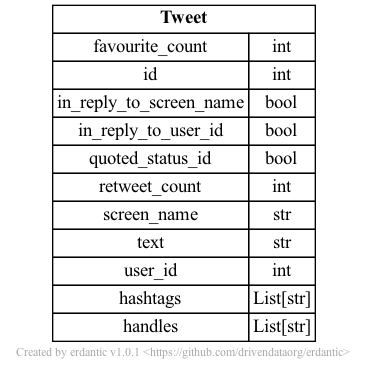

In [1]:
from IPython import display

display.Image('./tweet.png')


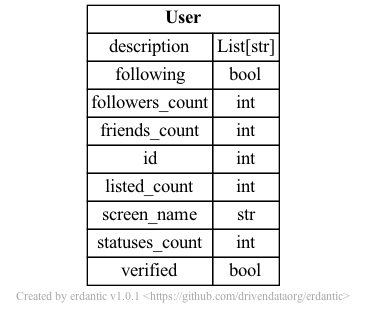

In [2]:
display.Image('./user.png')

In [3]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Steve's congressional tweet session")\
                            .config("spark.driver.memory", "5g")\
                            .config("spark.driver.cores", '4')\
                            .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/07/10 19:22:46 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
tweets_df = spark.read.json('../capstone_data/tweets.json')
users_df = spark.read.json('../capstone_data/users.json')

24/07/10 19:22:52 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [5]:
tweets_df.show(10)  

+------------+-----------+----------+------------------+--------------------+-----------------+--------------+---------+----+---------+---------+-----------------------+---------------------+-------------------------+-------------------+-----------------------+---------------+----+-----+------------------+----------------+--------------------+-------------+---------+-----------+--------------------+--------------------+---------+-------+------------------+---------------------+--------------+
|contributors|coordinates|created_at|display_text_range|            entities|extended_entities|favorite_count|favorited| geo|       id|   id_str|in_reply_to_screen_name|in_reply_to_status_id|in_reply_to_status_id_str|in_reply_to_user_id|in_reply_to_user_id_str|is_quote_status|lang|place|possibly_sensitive|quoted_status_id|quoted_status_id_str|retweet_count|retweeted|screen_name|              source|                text|truncated|user_id|withheld_copyright|withheld_in_countries|withheld_scope|
+---

In [6]:
#display('contributors')
tweets_df.select("contributors").distinct().show(truncate=False)
#display('coordinates')
tweets_df.select('coordinates').distinct().show(truncate=False)
#display('entities')
tweets_df.select("entities").distinct().show(truncate=False)
#display('extended_entities')
tweets_df.select(['extended_entities']).distinct().show(truncate=False)
#display('favorite_count')
tweets_df.select(['favorite_count']).distinct().show(truncate=False)
#display('favorited')
tweets_df.select(['favorited']).distinct().show(truncate=False)
#display('in_reply_to_screen_name')
tweets_df.select(['in_reply_to_screen_name']).distinct().show(truncate=False)
#display('in_reply_to_status_id')
tweets_df.select('in_reply_to_status_id').distinct().show(truncate=False)
#display('in_reply_to_user_id')
tweets_df.select('in_reply_to_user_id').distinct().show(truncate=False)
#display('is_quote_status')
tweets_df.select('is_quote_status').distinct().show(truncate=False)
#display('lang')
tweets_df.select('lang').distinct().show(truncate=False)
#display('place')
tweets_df.select('place').distinct().show(truncate=False)
#display('retweet_count')
tweets_df.select('retweet_count').distinct().show()
#display('retweeted')
tweets_df.select('retweeted').distinct().show(truncate=False)
#display('screenname')
tweets_df.select('screen_name').distinct().show(truncate=False)
#display('source')
tweets_df.select('source').distinct().show(truncate=False)
#display('withheld_copyright')
tweets_df.select('withheld_copyright').distinct().show(truncate=False)
#display('withheld_in_countries')
tweets_df.select('withheld_in_countries').distinct().show(truncate=False)
#display('withheld_scope')
tweets_df.select('withheld_scope').distinct().show(truncate=False)
#display('text')
tweets_df.select('text').distinct().show(truncate=False)

+------------+
|contributors|
+------------+
|null        |
+------------+



+-------------------------------------+
|coordinates                          |
+-------------------------------------+
|{[-101.87455818, 35.1881753], Point} |
|{[-96.83402724, 46.86267293], Point} |
|{[-121.49119377, 38.57841649], Point}|
|{[-77.008146, 38.886786], Point}     |
|{[-121.48909551, 38.57883085], Point}|
|{[-81.19828167, 34.1214815], Point}  |
|{[-97.74284743, 30.27273475], Point} |
|{[-96.9346334, 28.81878616], Point}  |
|{[-100.46518582, 31.44088575], Point}|
|{[-118.334692, 34.154984], Point}    |
|{[-70.51753694, 44.22576214], Point} |
|{[-117.712039, 33.61315], Point}     |
|{[-96.80195423, 46.84724991], Point} |
|{[-97.74279467, 30.27256086], Point} |
|{[-81.67557282, 34.3741918], Point}  |
|{[-82.8433072, 34.6654277], Point}   |
|{[-82.9833795, 34.6889104], Point}   |
|{[-90.18186081, 41.87355821], Point} |
|{[-121.49363995, 38.57652093], Point}|
|{[-82.9935751, 34.68688417], Point}  |
+-------------------------------------+
only showing top 20 rows



+---------------------------------------------------------------------------------------------------------------------------------------------------------+
|entities                                                                                                                                                 |
+---------------------------------------------------------------------------------------------------------------------------------------------------------+
|{[], null, [], [], [{28464751, 28464751, [0, 14], Noel Rodriguez, noelrodriguez}]}                                                                       |
|{[{[64, 69], TCOT}], null, [], [], []}                                                                                                                   |
|{[{[117, 126], sctweets}, {[127, 133], scgop}, {[134, 139], tcot}], null, [], [], []}                                                                    |
|{[{[86, 91], TCOT}, {[92, 99], FLTCOT}], null, [], [], []}     

+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|extended_entities                                                                                                                                                                                                                                                                                                                                                                                                                     |
+-----------------------------------------------------------------------------------------------------------------------------------------------------

+--------------+
|favorite_count|
+--------------+
|29            |
|26            |
|65            |
|19            |
|54            |
|0             |
|155           |
|113           |
|22            |
|7             |
|34            |
|184           |
|126           |
|94            |
|110           |
|136           |
|57            |
|43            |
|32            |
|84            |
+--------------+
only showing top 20 rows



+---------+
|favorited|
+---------+
|false    |
|true     |
+---------+



+-----------------------+
|in_reply_to_screen_name|
+-----------------------+
|RTHTGakaRoland         |
|AshleyAtTimes          |
|stevekimura            |
|KrisKetzKMBC           |
|tylerburgess           |
|joeelector             |
|SDonlon004             |
|MichaelWatsonDC        |
|EHHamrick              |
|ryanobles              |
|2SouthernBell          |
|GQMagazine             |
|SOTU                   |
|KristinMelton          |
|baltimoresun           |
|LindasVoiceOrg         |
|colinps                |
|sgeoffa                |
|EricMasten             |
|Alliance2endVAW        |
+-----------------------+
only showing top 20 rows



+---------------------+
|in_reply_to_status_id|
+---------------------+
|13518010948          |
|13992721800          |
|24681272657          |
|19798697583841282    |
|53148519804055552    |
|96967872689090560    |
|154652417382813696   |
|168156295885631489   |
|190159747046051841   |
|194199296625754112   |
|205385236803092481   |
|215992410000470016   |
|263026432853295105   |
|291962462398455808   |
|294845021276995584   |
|302509590292074496   |
|302584062713942016   |
|307174256771489793   |
|6580737314           |
|22199044221          |
+---------------------+
only showing top 20 rows



+-------------------+
|in_reply_to_user_id|
+-------------------+
|38416342           |
|13216782           |
|16061631           |
|14738157           |
|42194120           |
|96026164           |
|6519522            |
|239949176          |
|21116401           |
|108080788          |
|9793302            |
|76348185           |
|15647676           |
|242049285          |
|239122146          |
|128608886          |
|348971554          |
|261548933          |
|59694000           |
|563425151          |
+-------------------+
only showing top 20 rows



+---------------+
|is_quote_status|
+---------------+
|true           |
|false          |
+---------------+



+----+
|lang|
+----+
|en  |
|vi  |
|ro  |
|sl  |
|und |
|lv  |
|pl  |
|pt  |
|tl  |
|in  |
|cs  |
|tr  |
|is  |
|de  |
|es  |
|eu  |
|it  |
|sv  |
|nl  |
|hu  |
+----+
only showing top 20 rows



+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|place                                                                                                                                                                                                                                                             |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|{{[[[-117.845301, 33.6941797], [-117.758969, 33.6941797], [-117.758969, 33.773387], [-117.845301, 33.773387]]], Polygon}, [], United States, US, Tustin, CA, 02215ae29a77567c, Tustin, city, https://api.twitter.com/1.1

+-------------+
|retweet_count|
+-------------+
|           29|
|           26|
|          191|
|           65|
|          541|
|          270|
|          222|
|          243|
|          367|
|          278|
|           54|
|           19|
|          296|
|            0|
|          287|
|         9102|
|          348|
|          847|
|          502|
|         2244|
+-------------+
only showing top 20 rows



+---------+
|retweeted|
+---------+
|false    |
+---------+



+---------------+
|screen_name    |
+---------------+
|RepMarcyKaptur |
|CongMikeSimpson|
|RepAndyBarr    |
|SenJohnThune   |
|SenAlexander   |
|RepDennyHeck   |
|RepLaMalfa     |
|RepSires       |
|TulsiPress     |
|JayInslee      |
|RepLloydDoggett|
|Governor_LePage|
|RepSmucker     |
|JimPressOffice |
|repsandylevin  |
|GovernorKayIvey|
|davereichert   |
|SenStabenow    |
|RepLindaSanchez|
|RepVeasey      |
+---------------+
only showing top 20 rows



+---------------------------------------------------------------------------------+
|source                                                                           |
+---------------------------------------------------------------------------------+
|<a href="http://www.tumblr.com/" rel="nofollow">Tumblr</a>                       |
|<a href="http://www.apple.com/" rel="nofollow">OS X</a>                          |
|<a href="http://www.cloudhopper.com/" rel="nofollow">Cloudhopper</a>             |
|<a href="http://twitterfeed.com" rel="nofollow">twitterfeed</a>                  |
|<a href="http://seesmic.com/" rel="nofollow">Seesmic</a>                         |
|<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>|
|<a href="http://www.telly.com" rel="nofollow">TellyApp</a>                       |
|<a href="http://www.tweetcaster.com" rel="nofollow">TweetCaster</a>              |
|<a href="http://www.huffingtonpost.com" rel="nofollow">The Huffington Post<

+------------------+
|withheld_copyright|
+------------------+
|null              |
|true              |
+------------------+



+---------------------+
|withheld_in_countries|
+---------------------+
|null                 |
|[XY]                 |
+---------------------+



+--------------+
|withheld_scope|
+--------------+
|null          |
|status        |
+--------------+



+--------------------------------------------------------------------------------------------------------------------------------------------+
|text                                                                                                                                        |
+--------------------------------------------------------------------------------------------------------------------------------------------+
|Safe Harbor Gets Grant for Domestic Violence Prevention http://www.greenvilleonline.com/article/20081226/NEWS01/81227002/1068/YOURUPSTATE01 |
|attending a Transportation and Infrastructure Committee hearing on ensuring the investment of infrastructure in an economic recovery package|
|I'm on twitter!                                                                                                                             |
|There is support for job creation all across the district, it is important that we continue to work with one another on to las vegas, nm.   |

In [7]:
tweets_df = tweets_df.select(['favorite_count', 'id', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_user_id', \
'quoted_status_id','retweet_count','screen_name','text', 'user_id','created_at'])

In [8]:
import pandas as pd

tweets_pd_df = tweets_df.toPandas()

In [9]:
import re

hashtags = []
handles = []

for tweet in tweets_pd_df['text']:
    hashtags.append([x.group() for x in re.finditer( r'#\w+', tweet)])
    handles.append([x.group() for x in re.finditer( r'@\w+', tweet)])

tweets_pd_df['hashtags'] = hashtags
tweets_pd_df['handles'] = handles
    

In [10]:
tweets_pd_df.info()
tweets_pd_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243370 entries, 0 to 1243369
Data columns (total 13 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   favorite_count           1243370 non-null  int64  
 1   id                       1243370 non-null  int64  
 2   in_reply_to_screen_name  65411 non-null    object 
 3   in_reply_to_status_id    54146 non-null    float64
 4   in_reply_to_user_id      65411 non-null    float64
 5   quoted_status_id         56418 non-null    float64
 6   retweet_count            1243370 non-null  int64  
 7   screen_name              1243370 non-null  object 
 8   text                     1243370 non-null  object 
 9   user_id                  1243370 non-null  int64  
 10  created_at               1243370 non-null  int64  
 11  hashtags                 1243370 non-null  object 
 12  handles                  1243370 non-null  object 
dtypes: float64(3), int64(5), object(5)
memory 

favorite_count         id in_reply_to_screen_name  in_reply_to_status_id  \
0               0  877418565                    None                    NaN   
1               0  879618172                    None                    NaN   
2               0  879695803                    None                    NaN   
3               0  880393665                    None                    NaN   
4               0  880474266                    None                    NaN   
5               0  880676101                    None                    NaN   
6               0  891075719                    None                    NaN   
7               0  893175219                    None                    NaN   
8               0  894551506                    None                    NaN   
9               0  901977122                    None                    NaN   

   in_reply_to_user_id  quoted_status_id  retweet_count  screen_name  \
0                  NaN               NaN              0  JohnBoozman   
1                  NaN               NaN              0  JohnBoozman   
2                  NaN               NaN              0  JohnBoozman   
3                  NaN               NaN              0  JohnBoozman   
4                  NaN               NaN              0  JohnBoozman   
5                  NaN               NaN              0  JohnBoozman   
6                  NaN               NaN              0  JohnBoozman   
7                  NaN               NaN              0  JohnBoozman   
8                  NaN               NaN              0  JohnBoozman   
9                  NaN               NaN              0  JohnBoozman   

                                                text  user_id  created_at  \
0  On a conference call about a weekend trip to I...  5558312  1217870931   
1                          Being interviewed by KTHV  5558312  1218049485   
2  Being interviewed by KARN on his Arkansas Worl...  5558312  1218054936   
3              On KWHN in Fort Smith, that's 1320 AM  5558312  1218117172   
4  Attending a Military of the Purple Heart Cerem...  5558312  1218121925   
5      Touring Helath South Hospital in Fayetteville  5558312  1218134125   
6  conducting a veterans affairs economic opportu...  5558312  1219068455   
7                   doing an interview on kurm radio  5558312  1219234723   
8  Meeting with Emergency Management officials fr...  5558312  1219335847   
9  Listening to constituents at a roundtable disc...  5558312  1219948700   

  hashtags handles  
0       []      []  
1       []      []  
2       []      []  
3       []      []  
4       []      []  
5       []      []  
6       []      []  
7       []      []  
8       []      []  
9       []      []

In [11]:


"""
display('contributors enables')
users_df.select('contributors_enabled').distinct().show(truncate=False)
display('default profile')
users_df.select('default_profile').distinct().show(truncate=False)
display('description')
users_df.select('description').distinct().show(truncate=False)
display('entities')
users_df.select('entities').distinct().show(truncate=False)
display('follow_request_sent')
users_df.select('follow_request_sent').distinct().show(truncate=False)
display('following')
users_df.select('following').distinct().show(truncate=False)
display('is translation enabled')
users_df.select('is_translation_enabled').distinct().show(truncate=False)
display('is translator')
users_df.select('is_translator').distinct().show(truncate=False)
display('lang')
users_df.select('lang').distinct().show(truncate=False)
display('url')
users_df.select('url').show(10, truncate=False)
display('verified')
users_df.select('verified').distinct().show(10, truncate=False)

users_df.show(10)
"""

users_df = users_df.select(['description', 'following', 'followers_count', 'friends_count', 'id','listed_count','screen_name','statuses_count', 'verified'])
users_pd_df = users_df.toPandas()
users_pd_df.info()
users_df.show(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   description      548 non-null    object
 1   following        548 non-null    bool  
 2   followers_count  548 non-null    int64 
 3   friends_count    548 non-null    int64 
 4   id               548 non-null    int64 
 5   listed_count     548 non-null    int64 
 6   screen_name      548 non-null    object
 7   statuses_count   548 non-null    int64 
 8   verified         548 non-null    bool  
dtypes: bool(2), int64(5), object(2)
memory usage: 31.2+ KB
+--------------------+---------+---------------+-------------+----------+------------+---------------+--------------+--------+
|         description|following|followers_count|friends_count|        id|listed_count|    screen_name|statuses_count|verified|
+--------------------+---------+---------------+-------------+----------+------------+-

In [12]:
import inspect
import rich.syntax

import erdantic.examples.attrs


rich.syntax.Syntax(
    inspect.getsource(erdantic.examples.attrs), 
    "python",
    theme="default",
    line_numbers=True
)

   1 """Example data model classes using standard library's                                                        
   2 [`dataclasses`](https://docs.python.org/3/library/dataclasses.html) module."""                                
   3                                                                                                               
   4 from datetime import datetime                                                                                 
   5 from enum import Enum                                                                                         
   6 from typing import List, Optional                                                                             
   7                                                                                                               
   8 from attrs import define, field                                                                               
   9                                                                                                               
  10                                                                                                               
  11 class Alignment(str, Enum):                                                                                   
  12     LAWFUL_GOOD = "lawful_good"                                                                               
  13     NEUTRAL_GOOD = "neutral_good"                                                                             
  14     CHAOTIC_GOOD = "chaotic_good"                                                                             
  15     LAWFUL_NEUTRAL = "lawful_neutral"                                                                         
  16     TRUE_NEUTRAL = "true_neutral"                                                                             
  17     CHAOTIC_NEUTRAL = "chaotic_neutral"                                                                       
  18     LAWFUL_EVIL = "lawful_evil"                                                                               
  19     NEUTRAL_EVIL = "neutral_evil"                                                                             
  20     CHAOTIC_EVIL = "chaotic_evil"                                                                             
  21                                                                                                               
  22                                                                                                               
  23 @define                                                                                                       
  24 class Adventurer:                                                                                             
  25     """A person often late for dinner but with a tale or two to tell.                                         
  26                                                                                                               
  27     Attributes:                                                                                               
  28         name (str): Name of this adventurer                                                                   
  29         profession (str): Profession of this adventurer                                                       
  30         level (int): Level of this adventurer                                                                 
  31         alignment (Alignment): Alignment of this adventurer                                                   
  32     """                                                                                                       
  33                                                                                                               
  34     name: str                                                                                                 
  35     profession: str                                

In [13]:
                                                                                                               
from dataclasses import dataclass, field                                                                      
from datetime import datetime                                                                                 
from enum import Enum                                                                                         
from typing import List, Optional                                                                             
                                                                                                               
                                                                                                                  
class Alignment(str, Enum):                                                                                   
    LAWFUL_GOOD = "lawful_good"                                                                               
    NEUTRAL_GOOD = "neutral_good"                                                                             
    CHAOTIC_GOOD = "chaotic_good"                                                                             
    LAWFUL_NEUTRAL = "lawful_neutral"                                                                         
    TRUE_NEUTRAL = "true_neutral"                                                                             
    CHAOTIC_NEUTRAL = "chaotic_neutral"
    LAWFUL_EVIL = "lawful_evil"                                                                               
    NEUTRAL_EVIL = "neutral_evil"                                                                        
    CHAOTIC_EVIL = "chaotic_evil"                                                                             
                                                                                                              
                                                                                                               
@dataclass                                                                                                    
class Adventurer:                                                                                             
    """A person often late for dinner but with a tale or two to tell.                                         
                                                                                                               
    Attributes:                                                                                               
    name (str): Name of this adventurer                                                                   
    profession (str): Profession of this adventurer                                                       
    alignment (Alignment): Alignment of this adventurer                                                   
    level (int): Level of this adventurer                                                                     
    """                                                                                                       
                                                                                                                
    name: str                                                                                                 
    profession: str                                                                                           
    alignment: Alignment                                                                                      
    level: int = 1                                                                                            
                                                                                                                 
                                                                                                                 
@dataclass                                                                                                    
class QuestGiver:                                                                                             
    """A person who offers a task that needs completing.                                                                                                                                                                   
      Attributes:                                                                                               
      name (str): Name of this quest giver                                                                  
      faction (str): Faction that this quest giver belongs to                                               
      location (str): Location this quest giver can be found                                                
    """                                                                                                       

    name: str                                                                                                 
    faction: Optional[str] = None                                                                             
    location: str = "Adventurer's Guild"                                                                      
                                                                                                              
                                                                                                              
@dataclass                                                                                                    
class Quest:                                                                                                  
    """A task to complete, with some monetary reward.                                                         
                                                                                                               
    Attributes:                                                                                               
    name (str): Name by which this quest is referred to                                                   
    giver (QuestGiver): Person who offered the quest                                                      
    reward_gold (int): Amount of gold to be rewarded for quest completion                                 
    """                                                                                                       
                                                                                                        
    name: str                                                                                                 
    giver: QuestGiver                                                                                         
    reward_gold: int = 100                                                                                    
                                                                                                                 
                                                                                                                 
@dataclass                                                                                                    
class Party:                                                                                                  
     """A group of adventurers finding themselves doing and saying things altogether unexpected.               
                                                                                                                 
     Attributes:                                                                                               
     name (str): Name that party is known by                                                               
     formed_datetime (datetime): Timestamp of when the party was formed                                    
     members (List[Adventurer]): Adventurers that belong to this party                                     
     active_quest (Optional[Quest]): Current quest that party is actively tackling                         
     """                                                                                                       
                                                                                                                
     name: str                                                                                                 
     formed_datetime: datetime                                                                                 
     members: List[Adventurer] = field(default_factory=list)                                                   
     active_quest: Optional[Quest] = None

"""
0   description      548 non-null    object
 1   following        548 non-null    bool  
 2   followers_count  548 non-null    int64 
 3   friends_count    548 non-null    int64 
 4   id               548 non-null    int64 
 5   listed_count     548 non-null    int64 
 6   screen_name      548 non-null    object
 7   statuses_count   548 non-null    int64 
 8   verified         548 non-null    bool 
"""

"""
 0   favorite_count           1243370 non-null  int64  
 1   id                       1243370 non-null  int64  
 2   in_reply_to_screen_name  65411 non-null    object 
 3   in_reply_to_status_id    54146 non-null    float64
 4   in_reply_to_user_id      65411 non-null    float64
 5   quoted_status_id         56418 non-null    float64
 6   retweet_count            1243370 non-null  int64  
 7   screen_name              1243370 non-null  object 
 8   text                     1243370 non-null  object 
 9   truncated                1243370 non-null  bool   
 10  user_id                  1243370 non-null  int64  
 11  hashtags                 1243370 non-null  object 
 12  handles                  1243370 non-null  object
"""


@dataclass
class User:
    """
    a twitter user
    """
    description: List[str]
    following: bool
    followers_count: int
    friends_count:int
    id: int
    listed_count: int
    screen_name:str
    statuses_count: int
    verified: bool
    
    

@dataclass
class Tweet:
    """
    a tweet
    """
    favourite_count: int
    id: int
    in_reply_to_screen_name: bool
    in_reply_to_user_id: bool
    quoted_status_id: bool
    retweet_count: int
    screen_name: str
    text: str
    user_id: int
    hashtags: List[str]
    handles:  List[str]
    

In [14]:

import pandas as pd
from pyspark.sql import Row

spark_df = spark.createDataFrame([
    Row(a=1),
    Row(a=2),
    Row(a=3),
    Row(a=4),
    Row(a=5),
    Row(a=6),
    Row(a=7),
    Row(a=8),
    Row(a=9),
    Row(a=10)])

spark_df.show(10)

spark_df = spark.createDataFrame(pd.DataFrame({'a':[1,2,3,4,5,6,7,8,9,10]}))

spark_df.show(10)



+---+
|  a|
+---+
|  1|
|  2|
|  3|
|  4|
|  5|
|  6|
|  7|
|  8|
|  9|
| 10|
+---+

+---+
|  a|
+---+
|  1|
|  2|
|  3|
|  4|
|  5|
|  6|
|  7|
|  8|
|  9|
| 10|
+---+



In [15]:
from pyspark.sql import functions as F


joined_spark_df = tweets_df.select(['favorite_count','created_at','id','in_reply_to_screen_name','in_reply_to_status_id','in_reply_to_user_id','quoted_status_id','retweet_count','text','user_id']).join(users_df, tweets_df.user_id == users_df.id, 'inner')

In [16]:
joined_spark_df.show(10)

+--------------+----------+---------+-----------------------+---------------------+-------------------+----------------+-------------+--------------------+-------+--------------------+---------+---------------+-------------+-------+------------+-----------+--------------+--------+
|favorite_count|created_at|       id|in_reply_to_screen_name|in_reply_to_status_id|in_reply_to_user_id|quoted_status_id|retweet_count|                text|user_id|         description|following|followers_count|friends_count|     id|listed_count|screen_name|statuses_count|verified|
+--------------+----------+---------+-----------------------+---------------------+-------------------+----------------+-------------+--------------------+-------+--------------------+---------+---------------+-------------+-------+------------+-----------+--------------+--------+
|             0|1217870931|877418565|                   null|                 null|               null|            null|            0|On a conference c...

In [17]:

from pyspark.sql.functions import desc, count, countDistinct

#so, each user has only one screenname among the user data
users_df.select(['id','screen_name']).groupBy(['id','screen_name']).agg(count('screen_name')).select(countDistinct('count(screen_name)')).show(10)

#users_df.select(['id', 'screen_name','statuses_count']).orderBy(desc('statuses_count')).show(25)
#users_df.select(['id', 'screen_name'])

+----------------------------------+
|count(DISTINCT count(screen_name))|
+----------------------------------+
|                                 1|
+----------------------------------+



In [18]:
#There is only one screen name per twitter user in the twitter data
tweets_df.select(['user_id','screen_name']).groupBy(['user_id','screen_name']).agg(countDistinct('screen_name')).select(countDistinct('count(screen_name)')).show(10)


+----------------------------------+
|count(DISTINCT count(screen_name))|
+----------------------------------+
|                                 1|
+----------------------------------+



In [19]:
tweets_df.select(['id','user_id']).groupBy(['user_id']).agg(countDistinct('id')).sort('count(id)',ascending=False).show(10)

+----------+---------+
|   user_id|count(id)|
+----------+---------+
|2962868158|     3258|
| 247334603|     3252|
|  18023868|     3250|
|3141213592|     3250|
|  14845376|     3249|
| 968650362|     3249|
| 233737858|     3249|
| 113036476|     3249|
|1135486501|     3248|
| 234141596|     3247|
+----------+---------+
only showing top 10 rows



In [20]:
import pyspark.sql.functions as F
import pyspark.sql.types as T



tweets_df_year = tweets_df.withColumn('date', F.to_timestamp(tweets_df.created_at.cast(dataType=T.TimestampType()))).withColumn('year',F.year('date'))


In [21]:
tweets_df_by_year = tweets_df_year.select(['id','user_id','screen_name','year']).groupby(['user_id','year']).agg(count('id'))
tweets_df_by_year.sort(['user_id','year']).show(100)

+--------+----+---------+
| user_id|year|count(id)|
+--------+----+---------+
| 5558312|2008|       44|
| 5558312|2009|      160|
| 5558312|2010|       80|
| 5558312|2011|      267|
| 5558312|2012|      250|
| 5558312|2013|      331|
| 5558312|2014|      371|
| 5558312|2015|      479|
| 5558312|2016|      803|
| 5558312|2017|      356|
| 7270292|2013|       65|
| 7270292|2014|       76|
| 7270292|2015|      355|
| 7270292|2016|      366|
| 7270292|2017|      158|
| 7429102|2013|      726|
| 7429102|2014|      841|
| 7429102|2015|      638|
| 7429102|2016|      605|
| 7429102|2017|      394|
|10615232|2013|      403|
|10615232|2014|      445|
|10615232|2015|      835|
|10615232|2016|     1023|
|10615232|2017|      533|
|11651202|2015|     1272|
|11651202|2016|     1196|
|11651202|2017|      765|
|13218102|2016|     1779|
|13218102|2017|     1452|
|13491312|2013|      224|
|13491312|2014|      472|
|13491312|2015|     1025|
|13491312|2016|      927|
|13491312|2017|      584|
|14135426|20

In [22]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

tweets_df_totals= tweets_df_year.select(['screen_name','id']).groupby(['screen_name']).agg(count('id'))
tweets_df_totals.sort('screen_name').show(10)
tweets_df_totals = tweets_df_totals.sort('screen_name')
print(tweets_df_totals.count())
retweets_df_totals = tweets_df_year.select(['screen_name','retweet_count']).groupby(['screen_name']).sum('retweet_count')
retweets_df_totals.sort('screen_name').show(10)

print(retweets_df_totals.count())
tweets_retweets_join = tweets_df_totals.join(retweets_df_totals,'screen_name').sort('screen_name').select(['count(id)','sum(retweet_count)'])
tweets_retweets_join.show(10)
print(tweets_retweets_join.stat.corr('count(id)','sum(retweet_count)'))


#pearsonCorr = Correlation.corr(tweets_retweets_join,'features','pearson').collect()[0][0]

+---------------+---------+
|    screen_name|count(id)|
+---------------+---------+
|AkGovBillWalker|     1642|
|AnthonyBrownMD4|     1864|
|  AsaHutchinson|     3215|
|AustinScottGA08|     2019|
|BennieGThompson|      752|
|    BillCassidy|     3195|
|     BillHaslam|     1649|
|    BradSherman|     1117|
|     ButchOtter|     1449|
|  Call_Me_Dutch|     2426|
+---------------+---------+
only showing top 10 rows



545


+---------------+------------------+
|    screen_name|sum(retweet_count)|
+---------------+------------------+
|AkGovBillWalker|             12701|
|AnthonyBrownMD4|            228612|
|  AsaHutchinson|             58061|
|AustinScottGA08|              6292|
|BennieGThompson|             75151|
|    BillCassidy|             55489|
|     BillHaslam|             29362|
|    BradSherman|             31214|
|     ButchOtter|              3466|
|  Call_Me_Dutch|             21784|
+---------------+------------------+
only showing top 10 rows



545


+---------+------------------+
|count(id)|sum(retweet_count)|
+---------+------------------+
|     1642|             12701|
|     1864|            228612|
|     3215|             58061|
|     2019|              6292|
|      752|             75151|
|     3195|             55489|
|     1649|             29362|
|     1117|             31214|
|     1449|              3466|
|     2426|             21784|
+---------+------------------+
only showing top 10 rows



0.11257198563687312


In [23]:

from pyspark.sql.types import IntegerType

retweet_count_spark = tweets_df_year.select(['screen_name','retweet_count','year'])#.withColumn('retweets',F.col('retweet_count').cast(T.IntegerType()).alias('retweets'))#.groupby(['user_id']).agg(sum('retweets'))
#retweet_count_spark = retweet_count_spark.withColumn('retweets', retweet_count_spark["retweet_count"].cast(IntegerType()).alias('retweets'))#.groupby(['user_id']).agg(sum('retweets'))
#retweet_count_spark_by_year = retweet_count_spark.()
retweet_count_spark.show(10)
#retweet_count_spark.sort('retweets', ascending=False)
#retweet_count_spark.describe() 
pd_retweet_count_spark = retweet_count_spark.toPandas()
pd_retweet_count_spark.info()

+-----------+-------------+----+
|screen_name|retweet_count|year|
+-----------+-------------+----+
|JohnBoozman|            0|2008|
|JohnBoozman|            0|2008|
|JohnBoozman|            0|2008|
|JohnBoozman|            0|2008|
|JohnBoozman|            0|2008|
|JohnBoozman|            0|2008|
|JohnBoozman|            0|2008|
|JohnBoozman|            0|2008|
|JohnBoozman|            0|2008|
|JohnBoozman|            0|2008|
+-----------+-------------+----+
only showing top 10 rows



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243370 entries, 0 to 1243369
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   screen_name    1243370 non-null  object
 1   retweet_count  1243370 non-null  int64 
 2   year           1243370 non-null  int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 23.7+ MB


In [24]:
pd_retweet_count_spark.groupby(['screen_name','year']).sum('retweet_count').head(20)

pd_retweet_count_year = pd_retweet_count_spark.groupby(['year','screen_name']).agg({'retweet_count':sum})

df = pd_retweet_count_year.sort_values(['year','retweet_count'],ascending=False)

df = df.reset_index()

#df = pd_retweet_count_year.to_frame()#pd_retweet_count_year.head(20)

print(df.head(100))

print(df['year'].nunique())

arr_retweets = [df[df['year']== x] for x in range(2008,2018)] 

    year      screen_name  retweet_count
0   2017  realDonaldTrump       15833886
1   2017       SenSanders        7021526
2   2017            POTUS        5855933
3   2017        RepKihuen        4896177
4   2017       marcorubio        4034253
..   ...              ...            ...
95  2017         RepByrne         225362
96  2017  SenatorMenendez         222794
97  2017      RepCummings         222281
98  2017     RepGwenMoore         214151
99  2017        clairecmc         213233

[100 rows x 3 columns]
10


/var/folders/y_/3klm_f11101cp70nthqmbfhh0000gn/T/ipykernel_3145/546997460.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd_retweet_count_year = pd_retweet_count_spark.groupby(['year','screen_name']).agg({'retweet_count':sum})


In [25]:
print(pd_retweet_count_spark[['screen_name','retweet_count']].groupby(['screen_name']).sum('retweet_count').head(20))

pandas_retweet_count_spark = pd_retweet_count_spark[['screen_name','retweet_count']].groupby(['screen_name']).sum('retweet_count').reset_index()

tweet_count = tweets_df_year.select(['screen_name','id','retweet_count']).toPandas()
#print(tweet_count.head(10))

print(pandas_retweet_count_spark['retweet_count'].head(10))



                 retweet_count
screen_name                   
AkGovBillWalker          12701
AnthonyBrownMD4         228612
AsaHutchinson            58061
AustinScottGA08           6292
BennieGThompson          75151
BillCassidy              55489
BillHaslam               29362
BradSherman              31214
ButchOtter                3466
Call_Me_Dutch            21784
CaptClayHiggins           3394
ChrisCoons               70465
ChrisMurphyCT          2245810
ChrisVanHollen          136714
ChuckGrassley            80851
Clyburn                 325145
ConawayTX11               6018
CongCulberson            66398
CongMikeSimpson           1086
CongressmanGT             8935


0     12701
1    228612
2     58061
3      6292
4     75151
5     55489
6     29362
7     31214
8      3466
9     21784
Name: retweet_count, dtype: int64


In [26]:
#print(tweet_count.info())
#print(tweet_count.head(10))

#print(tweet_count.groupby(['screen_name']).id.nunique())

pandas_tweet_count = tweet_count.groupby(['screen_name']).agg({'id':'count'})
print(pandas_tweet_count.head(10))

print(pandas_tweet_count['id'].reset_index()['id'].corr(pandas_retweet_count_spark['retweet_count']))

print(pd_retweet_count_spark.head(10))



                   id
screen_name          
AkGovBillWalker  1642
AnthonyBrownMD4  1864
AsaHutchinson    3215
AustinScottGA08  2019
BennieGThompson   752
BillCassidy      3195
BillHaslam       1649
BradSherman      1117
ButchOtter       1449
Call_Me_Dutch    2426
0.11257198563687298
   screen_name  retweet_count  year
0  JohnBoozman              0  2008
1  JohnBoozman              0  2008
2  JohnBoozman              0  2008
3  JohnBoozman              0  2008
4  JohnBoozman              0  2008
5  JohnBoozman              0  2008
6  JohnBoozman              0  2008
7  JohnBoozman              0  2008
8  JohnBoozman              0  2008
9  JohnBoozman              0  2008


In [27]:
arr_retweets[0].head(10)
#arr_retweets[9].head(10)

year    screen_name  retweet_count
2648  2008      JeffFlake              0
2649  2008     Jim_Jordan              0
2650  2008    JohnBoozman              0
2651  2008  henrymcmaster              0
2652  2008  repblumenauer              0

                 followers_count  friends_count  listed_count  statuses_count  \
followers_count         1.000000       0.039943      0.874934        0.338355   
friends_count           0.039943       1.000000      0.146920        0.495582   
listed_count            0.874934       0.146920      1.000000        0.530473   
statuses_count          0.338355       0.495582      0.530473        1.000000   
retweet_count           0.026811       0.180822      0.179155        0.541408   

                 retweet_count  
followers_count       0.026811  
friends_count         0.180822  
listed_count          0.179155  
statuses_count        0.541408  
retweet_count         1.000000  


<Axes: >

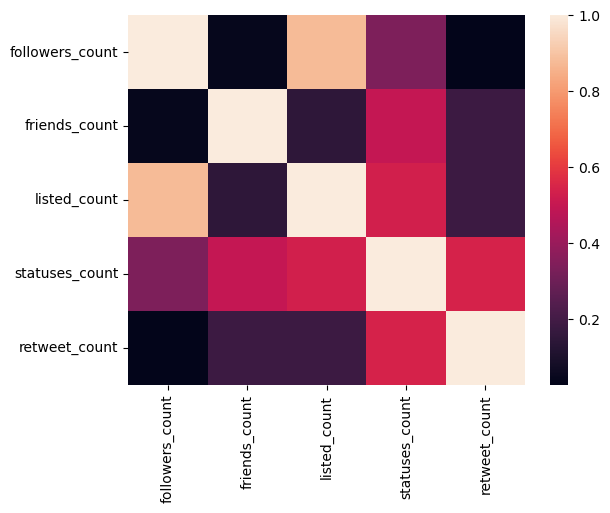

In [28]:
#users_df.show(10)
import seaborn as sns

pandas_user_metadata_df = users_df.select(['id','screen_name','followers_count','friends_count','listed_count','statuses_count']).toPandas()

#pandas_tweet_count = pandas_tweet_count.toPandas()
heat_map_data  = pandas_user_metadata_df.join(pandas_tweet_count,how='inner',on='screen_name',lsuffix='_left',rsuffix='_right')

heat_map_data = heat_map_data[['followers_count', 'friends_count','listed_count', 'statuses_count', 'id_right']]

#heat_map_data.head(10)

heat_map_matrix = heat_map_data.rename(columns = {'id_right':'retweet_count'}).corr()

print(heat_map_matrix)

sns.heatmap(heat_map_matrix)



#user_metadata_df.show(10)

In [29]:
tweets_pd_df.head(10)

from collections import defaultdict

all_hashtags_count = defaultdict(int)
all_handles_count = defaultdict(int)



all_hashtags = []
all_handles = []


for index, row in tweets_pd_df.iterrows():
    #print(x)
    #print("XXXXXX")
    hashtags = row['hashtags']
    handles = row['handles']
    for hashtag in hashtags:
        all_hashtags_count[hashtag] += 1
    for handle in handles:
        all_handles_count[handle[1:].strip()] += 1

        
    #print("YYYYY")


"""
for x in tweets_pd_df['hashtags']:
    if x != []:
        for hashtag in x:
            #print(hashtag)
            print(all_hashtags_count['hashtag'])
            all_hashtags_count[hashtag] = all_hashtags_count[hashtag] + 1



print(all_handles)
print(all_hashtags)
"""

"\nfor x in tweets_pd_df['hashtags']:\n    if x != []:\n        for hashtag in x:\n            #print(hashtag)\n            print(all_hashtags_count['hashtag'])\n            all_hashtags_count[hashtag] = all_hashtags_count[hashtag] + 1\n\n\n\nprint(all_handles)\nprint(all_hashtags)\n"

In [30]:
print(len(all_handles_count))

for key, value in all_handles_count.items():
    print(key, ' ', value)
    

159042
AlanBarber   1
boblatta   475
club4growth   60
michaelpleahy   2
penneymarie   1
mike_ware   1
kenblackwell   4
michelebachmann   7
james_barnes   1
tweetcongress   9
kevinomccarthy   38
DoubleTap   1
BoazItsHaky   1
AndyVance   1
JanSimpson   5
MicheleBachmann   73
ch0wda   1
mattlewis01   1
YRTV   1
repcom1140   1
caddyjimmy   1
retiredfirecapt   16
kevenjay   1
nbcsquire   1
mycall2rise   1
gopsaver   1
jtstl   1
dailybragger   1
Resseguie   1
belmontdevil   1
DonnaMMiller   2
marcialfudge   1
_seth   1
Mshoop   1
KRyanJames   1
williamspa   1
patbell   5
whitecheryl   1
lspearmanii   1
PressHerald   74
SomerG   4
thestate   32
Kevin_Crouch   1
JohnMcCain   13
bettnet   1
AmyinMaine   5
LadyOTrout   2
SenJohnMcCain   919
Citizensnews   4
gordongates   1
cathymcmorris   914
munseykris   1
Politico   229
rickswrecker   2
sacoharry   1
taxcredit   1
BenBowman   1
addthis   25
FlLady   3
gopexile   3
UNGRU   2
BrendaM53   1
jdfox   2
kburn   1
Duhh   1
Flexlewis1   1
foolery   1


In [31]:
print(len(all_hashtags_count))

for key, value  in all_hashtags_count.items():
    print(key, ' ', value)



104185
#rnc08   1
#pork   39
#flake   4
#TCOT   555
#tcot   8023
#8   46
#rebuild   4
#rncchair   1
#techGOP   9
#ohcons   1
#gopc   1
#rsc   9
#stimulus   66
#sctcot   52
#cantor   43
#gopconference   6
#politics   456
#texas   146
#Prop_8   1
#5   102
#1   1297
#teaparty   392
#txtea   1
#HouseFloor   33
#swineflu   1
#MI12   1
#politic   1
#politician   1
#transportGOP   1
#pawatercooler   7
#sctweets   1629
#NPW09   1
#scgop   115
#tax   284
#energy   1351
#FL   342
#tweetpalawmaker   1
#goppolicy   4
#155   1
#GOP   3323
#scctcot   1
#GOPpolicy   1
#redstate   4
#tea   18
#right   4
#redcounty   1
#TEA   9
#Tax   46
#Right   1
#1issue   1
#P2   21
#public   7
#159   1
#p2   1667
#RIGHT   2
#SGP   18
#HASCRepublicans   7
#sayfie   1085
#161   2
#ACES   11
#capandtax   11
#REDCO   1
#ARRA   16
#ARRAMaine   1
#iranelection   2
#ACORN   14
#acornwatch   32
#Iranelection   1
#IranElection   4
#371   1
#acorn   49
#gr88   1
#fb   102
#GOPConference   2
#sanford   1
#163   1
#RS   13
#fl

In [32]:
screen_names = list(set([x.lower() for x in users_df.select(['screen_name']).toPandas()['screen_name'].values]))
print(screen_names)

screen_name_counts = defaultdict(int)

for k, v in all_handles_count.items():
    
    if k.lower() in screen_names:
        
        screen_name_counts[k.lower()] += value


print(dict(screen_name_counts.items()))

df_screen_names_counts = pd.DataFrame(screen_name_counts.items(), columns=['screen_name','count'])


print(df_screen_names_counts.head(10))

df_screen_names_counts.sort_values(by=['count'], ascending=False, inplace=True)

df_screen_names_counts.head(15)

['repfranklucas', 'chrismurphyct', 'repbillflores', 'reptimmurphy', 'jiminhofe', 'repjimbanks', 'gkbutterfield', 'senorrinhatch', 'jefffortenberry', 'repwebster', 'reprobinkelly', 'janschakowsky', 'repseanduffy', 'repscottperry', 'senatorshaheen', 'repthompson', 'reprickcrawford', 'reprwilliams', 'replloyddoggett', 'sengarypeters', 'normajtorres', 'senangusking', 'repteddeutch', 'repdwstweets', 'repjohnfaso', 'senatortimscott', 'tomrooney', 'drnealdunnfl2', 'usrepmikedoyle', 'virginiafoxx', 'sendansullivan', 'rephartzler', 'repjudychu', 'senkamalaharris', 'reptommacarthur', 'usrepricknolan', 'martinheinrich', 'govsambrownback', 'repcartwright', 'repmikebishop', 'repbonamici', 'repdesantis', 'tiberipress', 'corybooker', 'kycomer', 'repbeatty', 'nc_governor', 'gov_martinez', 'rephalrogers', 'repmiketurner', 'jaredpolis', 'jimlangevin', 'louisianagov', 'repdrewferguson', 'usrepkcastor', 'govphilscott', 'sencortezmasto', 'repadriansmith', 'reprichhudson', 'sanfordbishop', 'repmikequigley',

screen_name  count
275  realdonaldtrump      7
375          kycomer      7
389      repcummings      6
185    senwhitehouse      6
207           repebj      6
16         clairecmc      6
102   desjarlaistn04      6
395    scotttaylorva      5
357     repdwstweets      5
12         gopleader      5
95   rep_stevewomack      5
219       mactxpress      5
5     lamarsmithtx21      5
49           jahimes      4
186       markwarner      4

In [33]:
import networkx as nx
twitter_network = nx.Graph()


In [34]:
from textblob import TextBlob

tweets_pd_df['AB_retweeted'] = pd.to_numeric(tweets_pd_df['retweet_count'] > 0)

tweets_pd_df['sentiment'] = tweets_pd_df.text.apply(lambda text: TextBlob(text).sentiment[0])

tweets_pd_df.info()

tweets_pd_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243370 entries, 0 to 1243369
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   favorite_count           1243370 non-null  int64  
 1   id                       1243370 non-null  int64  
 2   in_reply_to_screen_name  65411 non-null    object 
 3   in_reply_to_status_id    54146 non-null    float64
 4   in_reply_to_user_id      65411 non-null    float64
 5   quoted_status_id         56418 non-null    float64
 6   retweet_count            1243370 non-null  int64  
 7   screen_name              1243370 non-null  object 
 8   text                     1243370 non-null  object 
 9   user_id                  1243370 non-null  int64  
 10  created_at               1243370 non-null  int64  
 11  hashtags                 1243370 non-null  object 
 12  handles                  1243370 non-null  object 
 13  AB_retweeted             1243370 non-null 

favorite_count         id in_reply_to_screen_name  in_reply_to_status_id  \
0               0  877418565                    None                    NaN   
1               0  879618172                    None                    NaN   
2               0  879695803                    None                    NaN   
3               0  880393665                    None                    NaN   
4               0  880474266                    None                    NaN   
5               0  880676101                    None                    NaN   
6               0  891075719                    None                    NaN   
7               0  893175219                    None                    NaN   
8               0  894551506                    None                    NaN   
9               0  901977122                    None                    NaN   

   in_reply_to_user_id  quoted_status_id  retweet_count  screen_name  \
0                  NaN               NaN              0  JohnBoozman   
1                  NaN               NaN              0  JohnBoozman   
2                  NaN               NaN              0  JohnBoozman   
3                  NaN               NaN              0  JohnBoozman   
4                  NaN               NaN              0  JohnBoozman   
5                  NaN               NaN              0  JohnBoozman   
6                  NaN               NaN              0  JohnBoozman   
7                  NaN               NaN              0  JohnBoozman   
8                  NaN               NaN              0  JohnBoozman   
9                  NaN               NaN              0  JohnBoozman   

                                                text  user_id  created_at  \
0  On a conference call about a weekend trip to I...  5558312  1217870931   
1                          Being interviewed by KTHV  5558312  1218049485   
2  Being interviewed by KARN on his Arkansas Worl...  5558312  1218054936   
3              On KWHN in Fort Smith, that's 1320 AM  5558312  1218117172   
4  Attending a Military of the Purple Heart Cerem...  5558312  1218121925   
5      Touring Helath South Hospital in Fayetteville  5558312  1218134125   
6  conducting a veterans affairs economic opportu...  5558312  1219068455   
7                   doing an interview on kurm radio  5558312  1219234723   
8  Meeting with Emergency Management officials fr...  5558312  1219335847   
9  Listening to constituents at a roundtable disc...  5558312  1219948700   

  hashtags handles  AB_retweeted  sentiment  
0       []      []         False   0.000000  
1       []      []         False   0.000000  
2       []      []         False  -0.100000  
3       []      []         False   0.000000  
4       []      []         False  -0.066667  
5       []      []         False   0.000000  
6       []      []         False   0.200000  
7       []      []         False   0.000000  
8       []      []         False   0.000000  
9       []      []         False   0.000000

In [35]:
tweets_pd_df['absolute_sentiement'] = abs(tweets_pd_df['sentiment'])
tweets_pd_df.head(10)
for i in range(1,10):
    print(i)
    tweets_pd_df[f"test_sentiment_{i}"] = (tweets_pd_df['absolute_sentiement'] > (0.1 * i)).astype(int)

tweets_pd_df['retweeted_int'] = (tweets_pd_df['retweet_count']).astype(int)

1
2
3
4
5
6
7
8
9


In [36]:
tweets_pd_df.info()
tweets_pd_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243370 entries, 0 to 1243369
Data columns (total 26 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   favorite_count           1243370 non-null  int64  
 1   id                       1243370 non-null  int64  
 2   in_reply_to_screen_name  65411 non-null    object 
 3   in_reply_to_status_id    54146 non-null    float64
 4   in_reply_to_user_id      65411 non-null    float64
 5   quoted_status_id         56418 non-null    float64
 6   retweet_count            1243370 non-null  int64  
 7   screen_name              1243370 non-null  object 
 8   text                     1243370 non-null  object 
 9   user_id                  1243370 non-null  int64  
 10  created_at               1243370 non-null  int64  
 11  hashtags                 1243370 non-null  object 
 12  handles                  1243370 non-null  object 
 13  AB_retweeted             1243370 non-null 

favorite_count         id in_reply_to_screen_name  in_reply_to_status_id  \
0               0  877418565                    None                    NaN   
1               0  879618172                    None                    NaN   
2               0  879695803                    None                    NaN   
3               0  880393665                    None                    NaN   
4               0  880474266                    None                    NaN   
5               0  880676101                    None                    NaN   
6               0  891075719                    None                    NaN   
7               0  893175219                    None                    NaN   
8               0  894551506                    None                    NaN   
9               0  901977122                    None                    NaN   

   in_reply_to_user_id  quoted_status_id  retweet_count  screen_name  \
0                  NaN               NaN              0  JohnBoozman   
1                  NaN               NaN              0  JohnBoozman   
2                  NaN               NaN              0  JohnBoozman   
3                  NaN               NaN              0  JohnBoozman   
4                  NaN               NaN              0  JohnBoozman   
5                  NaN               NaN              0  JohnBoozman   
6                  NaN               NaN              0  JohnBoozman   
7                  NaN               NaN              0  JohnBoozman   
8                  NaN               NaN              0  JohnBoozman   
9                  NaN               NaN              0  JohnBoozman   

                                                text  user_id  ...  \
0  On a conference call about a weekend trip to I...  5558312  ...   
1                          Being interviewed by KTHV  5558312  ...   
2  Being interviewed by KARN on his Arkansas Worl...  5558312  ...   
3              On KWHN in Fort Smith, that's 1320 AM  5558312  ...   
4  Attending a Military of the Purple Heart Cerem...  5558312  ...   
5      Touring Helath South Hospital in Fayetteville  5558312  ...   
6  conducting a veterans affairs economic opportu...  5558312  ...   
7                   doing an interview on kurm radio  5558312  ...   
8  Meeting with Emergency Management officials fr...  5558312  ...   
9  Listening to constituents at a roundtable disc...  5558312  ...   

   test_sentiment_1 test_sentiment_2 test_sentiment_3  test_sentiment_4  \
0                 0                0                0                 0   
1                 0                0                0                 0   
2                 0                0                0                 0   
3                 0                0                0                 0   
4                 0                0                0                 0   
5                 0                0                0                 0   
6                 1                0                0                 0   
7                 0                0                0                 0   
8                 0                0                0                 0   
9                 0                0                0                 0   

   test_sentiment_5  test_sentiment_6  test_sentiment_7  test_sentiment_8  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   
5                 0                 0                 0                 0   
6                 0                 0                 0                 0   
7                 0                 0                 0                 0   
8                 0                 0             

To do an AB test for each i above, here's what we need to do.
1.) We need to fill out the box of 4 squares.

  a.) Retweeted and over threshhold.

  b.) Retweeted and not over threshhold.

  c.) Not retweeted and over threshhold.

  d.) Not retweeted and not over threshhold.

Take all 4 numbers for each and plug them into to the online calculator https://thumbtack.github.io/abba/demo/abba.html .
